___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [3]:
df = pd.read_csv('Frozen_Dessert_Production.csv', 
                index_col='DATE',
                parse_dates=True  
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [4]:
df.head(3)

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.columns = ['Production']

In [7]:
df.head(3)

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235


<AxesSubplot:xlabel='DATE'>

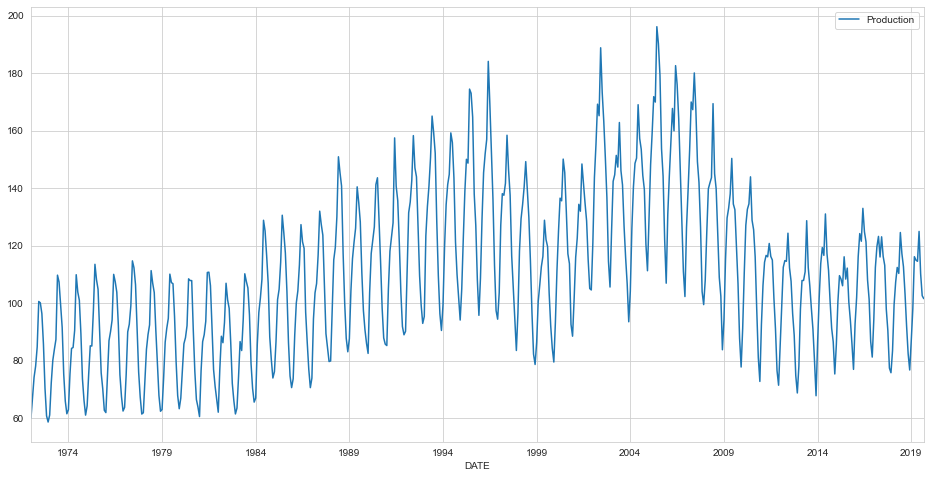

In [8]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [9]:
len(df)

573

In [19]:
test_size = 60

In [20]:
test_ind = len(df)- test_size
test_ind

513

In [21]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [22]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2014-05-01,116.631
2014-06-01,131.040
2014-07-01,117.272


In [23]:
test

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


## Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
length = 12 
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [28]:
len(generator)

525

In [29]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [30]:
X, y = generator[0]

In [31]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [33]:
train_scaled.shape

(513, 1)

In [34]:
n_features = train_scaled.shape[1]

In [35]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) ##return_sequence
model.add(LSTM(50, activation = 'tanh'))                                        #eger daha arkasindan bir layer daha  
                                                                                #gelecekse kullanilir.LSTM gelecekse
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

2022-07-03 17:42:20.842984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [37]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))##lstm  sonucu hesaplama. Lstm katmanlari .

40800

In [38]:
4 * ((100+1)*50+(50**2))


30200

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3,restore_best_weights = True)

In [50]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [51]:
len(validation_generator)

48

In [52]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
525/525 [==============================] - 3s 5ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 2/120
525/525 [==============================] - 3s 5ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 3/120
525/525 [==============================] - 3s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/120
525/525 [==============================] - 3s 5ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/120
525/525 [==============================] - 3s 5ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/120
525/525 [==============================] - 3s 5ms/step - loss: 0.0013 - val_loss: 0.0013


<AxesSubplot:>

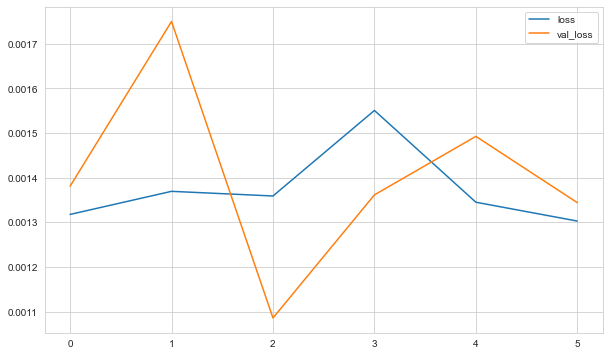

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [56]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 11ms/step


In [57]:
predictions_scaled

[array([0.22339636], dtype=float32),
 array([0.16604865], dtype=float32),
 array([0.14712682], dtype=float32),
 array([0.23117483], dtype=float32),
 array([0.34864312], dtype=float32),
 array([0.4122099], dtype=float32),
 array([0.43920702], dtype=float32),
 array([0.47505856], dtype=float32),
 array([0.50923085], dtype=float32),
 array([0.4460792], dtype=float32),
 array([0.37784547], dtype=float32),
 array([0.2825373], dtype=float32)]

In [58]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5002908243338905 
mae: 0.05113387543469341 
mse: 0.003852515729782043 
rmse: 0.06206863724766352


### Inverse Transformation and Comparing

In [75]:
predictions = scaler.inverse_transform(predictions_scaled)

In [76]:
compare = test[:12]

In [77]:
compare

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


<AxesSubplot:xlabel='DATE'>

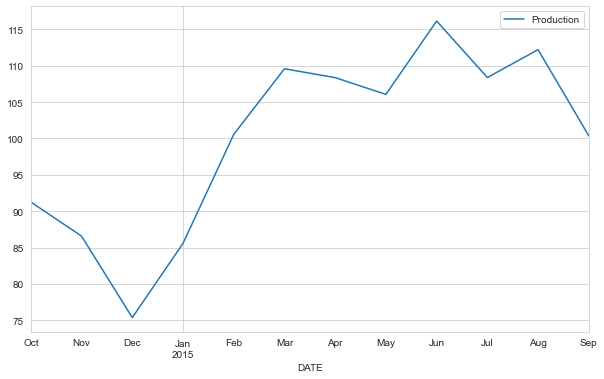

In [78]:
compare.plot()

In [81]:
compare['predictions'] = predictions

In [82]:
eval_metrics(compare.Production, compare.predictions)

r2_score: 0.5002908243338913 
mae: 7.031618633138883 
mse: 72.85135250191333 
rmse: 8.535300375611472


## with "relu" activation function

In [83]:
model2 = Sequential()
model2.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features))) 
model2.add(LSTM(50, activation = 'relu'))                                         
                                                                                
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [84]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [85]:
model2.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
525/525 [==============================] - 4s 5ms/step - loss: 0.0277 - val_loss: 0.0108
Epoch 2/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0108 - val_loss: 0.0051
Epoch 3/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0077 - val_loss: 0.0037
Epoch 4/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 5/120
525/525 [==============================] - 2s 5ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 6/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 7/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 8/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 9/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 10/120
525/525 [==============================] - 2s 4ms/step - loss: 0.0040 - val_lo

<AxesSubplot:>

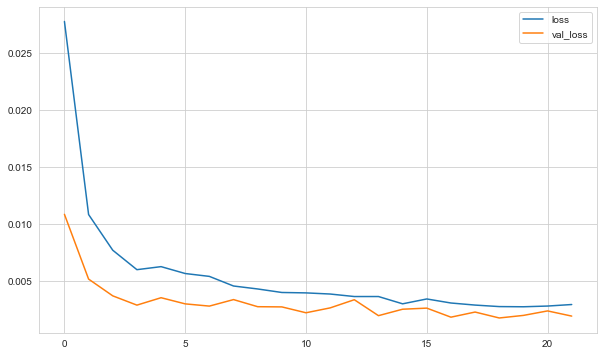

In [87]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

### Evaluation on Test Data

In [88]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 11ms/step


In [89]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7592743755418297 
mae: 0.03379960885817385 
mse: 0.001855877978527186 
rmse: 0.04307990225763269


### Inverse Transformation and Comparing

In [95]:
predictions2 = scaler.inverse_transform(predictions_scaled)

In [96]:
compare2 = test[:12]
compare2

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


<AxesSubplot:xlabel='DATE'>

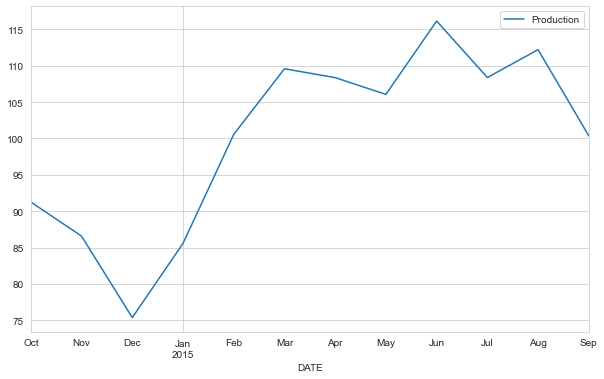

In [98]:
compare2.plot()

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [99]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [100]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [101]:
len(df)

573

In [102]:
len(generator)

561

In [103]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 11ms/step


In [104]:
forecast = scaler.inverse_transform(forecast)

In [105]:
forecast

array([[ 92.06366178],
       [ 83.36526141],
       [ 82.92993269],
       [ 93.14836175],
       [107.04774224],
       [116.89676472],
       [121.87146293],
       [126.06417719],
       [127.29384397],
       [118.32655645],
       [108.06225177],
       [ 96.16927628]])

In [106]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [109]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [110]:
forecast

array([[ 92.06366178],
       [ 83.36526141],
       [ 82.92993269],
       [ 93.14836175],
       [107.04774224],
       [116.89676472],
       [121.87146293],
       [126.06417719],
       [127.29384397],
       [118.32655645],
       [108.06225177],
       [ 96.16927628]])

In [111]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [112]:
forecast_df

,Forecast
2019-10-01,92.064
2019-11-01,83.365
2019-12-01,82.930
2020-01-01,93.148
2020-02-01,107.048
2020-03-01,116.897
2020-04-01,121.871
2020-05-01,126.064
2020-06-01,127.294
2020-07-01,118.327


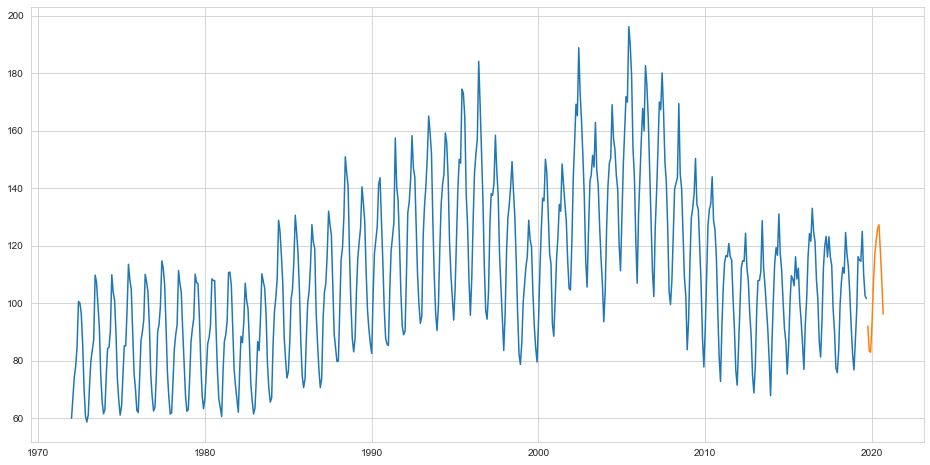

In [114]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [ ]:
##Joining

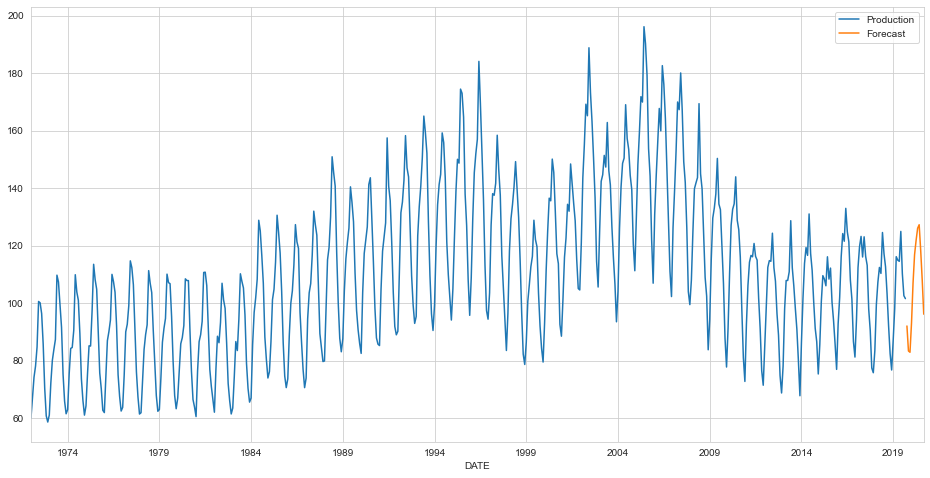

In [115]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

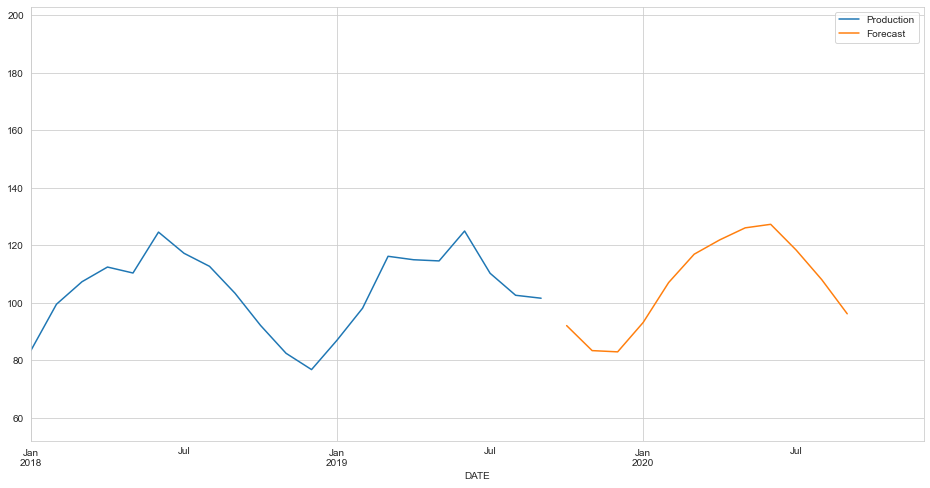

In [116]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [117]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)#datamiz ile predict datamizi birlestirdik.

<AxesSubplot:>

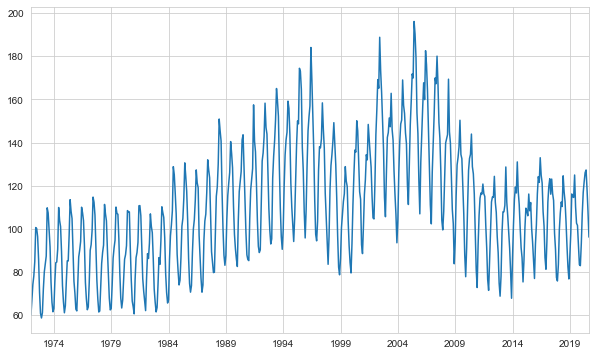

In [118]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___